# Testing ABC library

Experimenting with the [pyabc](https://pyabc.readthedocs.io/)

In [1]:
import pyabc

import numpy as np
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def model(parameter):
    return {"data": parameter["mean"] + 0.5 * np.random.randn()}

In [3]:
prior = pyabc.Distribution(mean=pyabc.RV("uniform", 0, 5))

In [4]:
def distance(x, y):
    return abs(x["data"] - y["data"])

In [5]:
abc = pyabc.ABCSMC(model, prior, distance)

INFO:Sampler:Parallelizing the sampling on 16 cores.


In [6]:
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "test.db"))
observation = 2.5
abc.new(db_path, {"data": observation})

INFO:History:Start <ABCSMC(id=13, start_time=2020-11-13 10:05:26.360595, end_time=None)>


In [7]:
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "test.db"))
observation = 2.5
abc.new(db_path, {"data": observation})

INFO:History:Start <ABCSMC(id=14, start_time=2020-11-13 10:05:26.518615, end_time=None)>


In [8]:
history = abc.run(minimum_epsilon=.1, max_nr_populations=10)

INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 1.3803517600969053
INFO:ABC:t: 0, eps: 1.3803517600969053.
INFO:ABC:Acceptance rate: 100 / 182 = 5.4945e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.7246661016420862.
INFO:ABC:Acceptance rate: 100 / 257 = 3.8911e-01, ESS=9.2894e+01.
INFO:ABC:t: 2, eps: 0.32509420490833185.
INFO:ABC:Acceptance rate: 100 / 325 = 3.0769e-01, ESS=9.1184e+01.
INFO:ABC:t: 3, eps: 0.1483838541702604.
INFO:ABC:Acceptance rate: 100 / 680 = 1.4706e-01, ESS=7.7123e+01.
INFO:ABC:t: 4, eps: 0.08167641591372848.
INFO:ABC:Acceptance rate: 100 / 1216 = 8.2237e-02, ESS=8.6959e+01.
INFO:ABC:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC(id=14, start_time=2020-11-13 10:05:26.518615, end_time=2020-11-13 10:05:30.049875)>


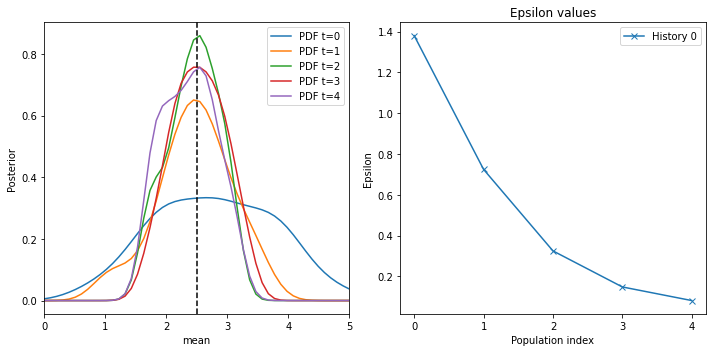

In [12]:
def plot_hist(hist):    
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    for t in range(hist.max_t+1):
        df, w = hist.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(
            df, w,
            xmin=0, xmax=5,
            x="mean", ax=axes[0],
            label="PDF t={}".format(t),
            )
    axes[0].axvline(observation, color="k", linestyle="dashed");
    axes[0].legend();
    
    pyabc.visualization.plot_epsilons(history, ax=axes[1])

plot_hist(history)

INFO:History:Start <ABCSMC(id=20, start_time=2020-11-13 10:14:15.172546, end_time=None)>
INFO:Epsilon:initial epsilon is 1.3803517600969053
INFO:ABC:t: 0, eps: 1.3803517600969053.
INFO:ABC:Acceptance rate: 100 / 168 = 5.9524e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.6655423984184388.
INFO:ABC:Acceptance rate: 100 / 222 = 4.5045e-01, ESS=9.6186e+01.
INFO:ABC:t: 2, eps: 0.31165420417859263.
INFO:ABC:Acceptance rate: 100 / 406 = 2.4631e-01, ESS=9.4562e+01.
INFO:History:Done <ABCSMC(id=20, start_time=2020-11-13 10:14:15.172546, end_time=2020-11-13 10:14:15.927537)>


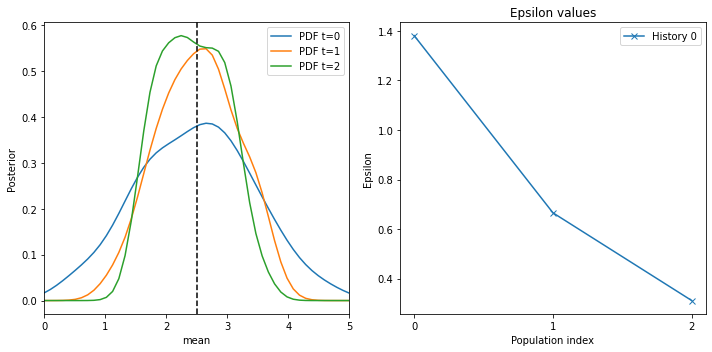

In [28]:
abc.new(db_path, {"data": observation})
history = abc.run(minimum_epsilon=0.1, max_nr_populations=3)
plot_hist(history)

**Questions**

 - What are populations?
    - aka 'generations'
    - basically the number of iterations
    
 - what is 't'?
    - Iteration (generation) number